# Students Performance in Exams
<a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams" target='_blank'>Click here for the dataset source</a>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

df.head() # to display only the first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Information

In [3]:
df.shape # size of the dataset in the form of (number_of_rows, number_of_columns)

(1000, 8)

In [4]:
df.isnull().sum().to_frame() # to find out if there's any null value in the dataset

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
df.info() # to find out number of null values and datatype (Dtype) of each column

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 8 columns):

 #   Column                       Non-Null Count  Dtype 

---  ------                       --------------  ----- 

 0   gender                       1000 non-null   object

 1   race/ethnicity               1000 non-null   object

 2   parental level of education  1000 non-null   object

 3   lunch                        1000 non-null   object

 4   test preparation course      1000 non-null   object

 5   math score                   1000 non-null   int64 

 6   reading score                1000 non-null   int64 

 7   writing score                1000 non-null   int64 

dtypes: int64(3), object(5)

memory usage: 62.6+ KB


In [6]:
df.describe() # to get statistical parameters of numerical data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.describe(include='O') # to get statistical parameters of non-numerical data (thus 'O' which means object data tye)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## Overall Dataset Visualization

### Bar Plot of Categorical Data

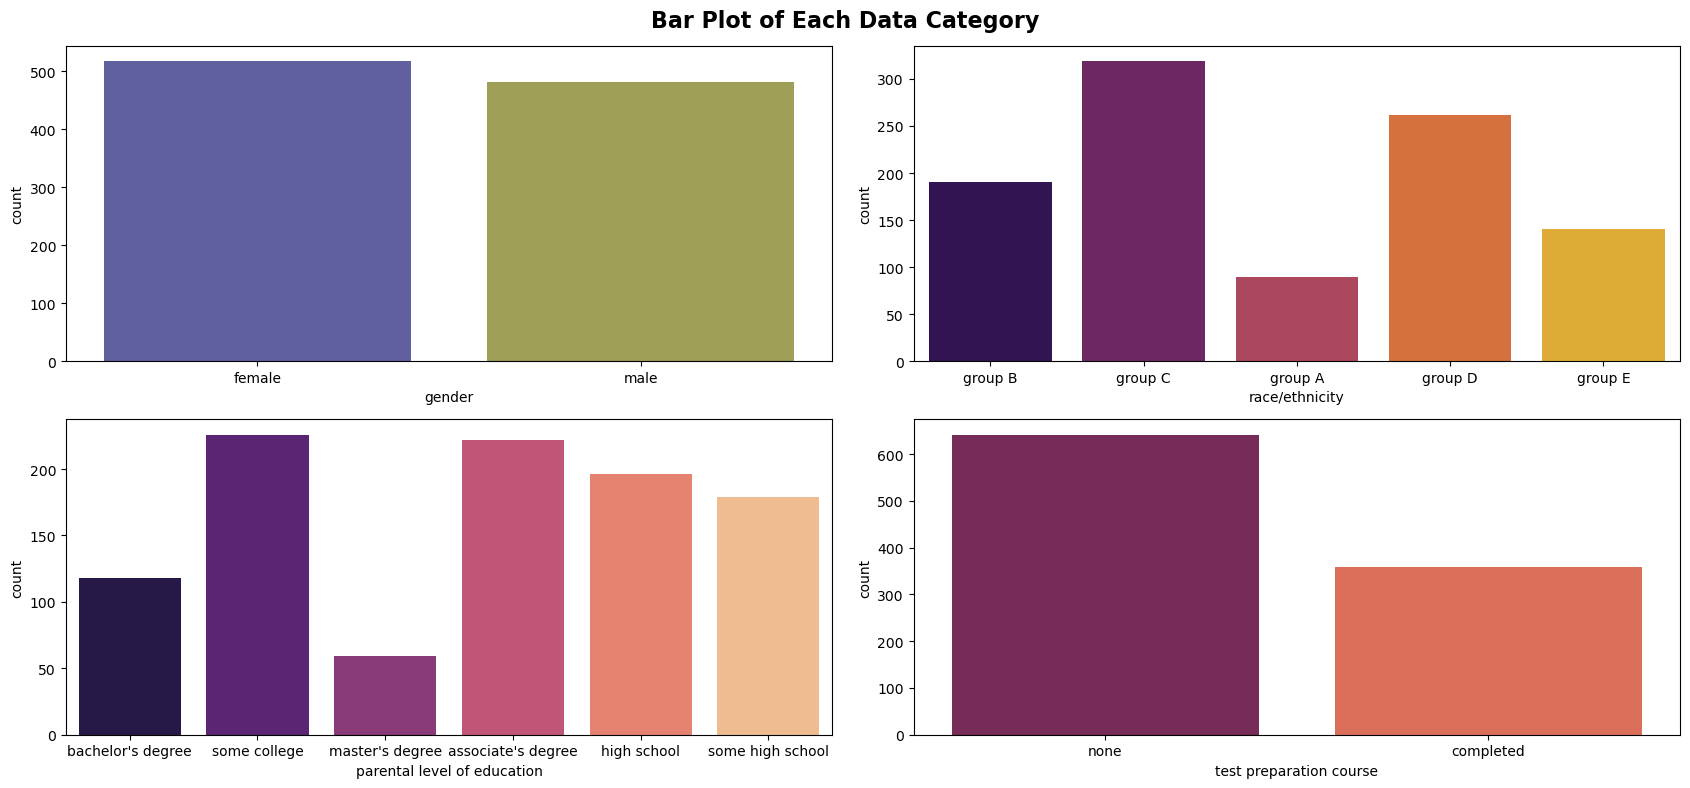

In [8]:
fig, axs = plt.subplots(2,2, figsize=(17,8))

sns.countplot(x='gender', data=df, ax=axs[0,0], palette='gist_stern')
sns.countplot(x='race/ethnicity', data=df, ax=axs[0,1], palette='inferno')
sns.countplot(x='parental level of education', data=df, ax=axs[1,0], palette='magma')
sns.countplot(x='test preparation course', data=df, ax=axs[1,1], palette='rocket')

plt.suptitle('Bar Plot of Each Data Category', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

### Pie Plot of Categorical Data

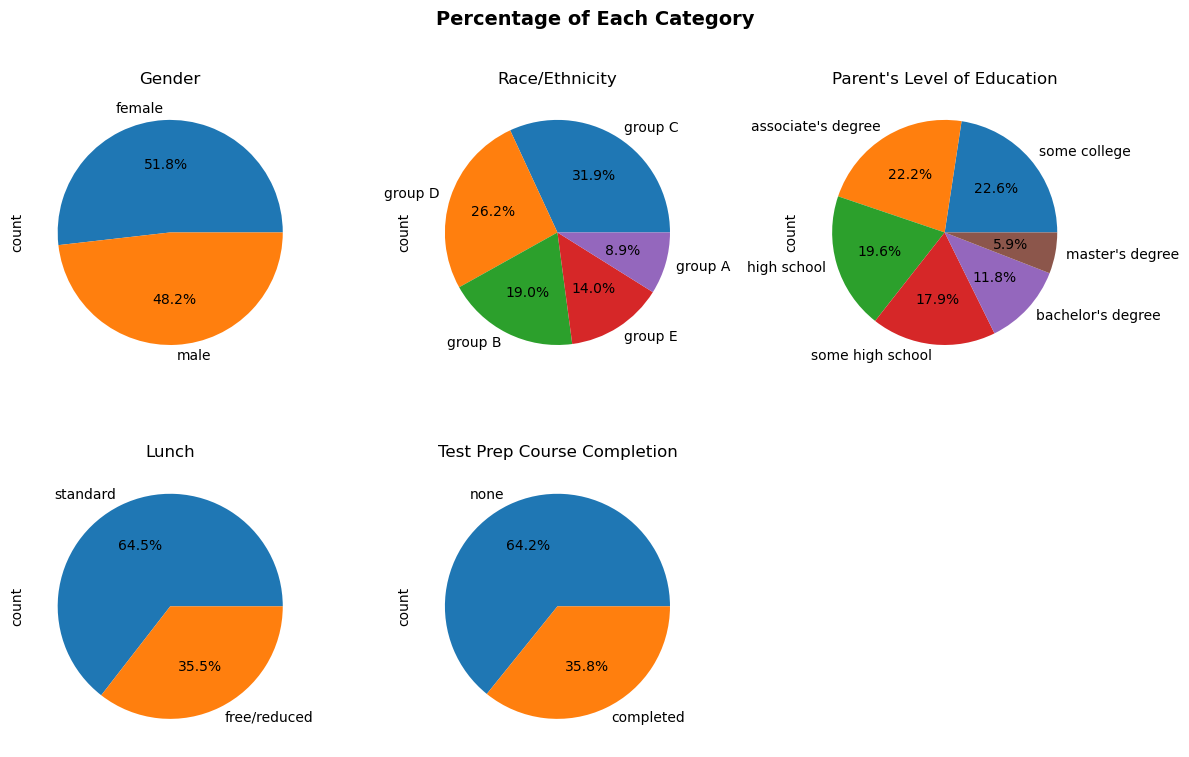

In [9]:
plt.figure(figsize=(12,8))
plt.suptitle('Percentage of Each Category', fontweight='bold', fontsize=14)

plt.subplot(231)
plt.title('Gender')
df['gender'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(232)
plt.title('Race/Ethnicity')
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(233)
plt.title("Parent's Level of Education")
df['parental level of education'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(234)
plt.title('Lunch')
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(235)
plt.title('Test Prep Course Completion')
df['test preparation course'].value_counts().plot.pie(autopct='%1.1f%%');

plt.tight_layout()

### Histogram of Numerical Data

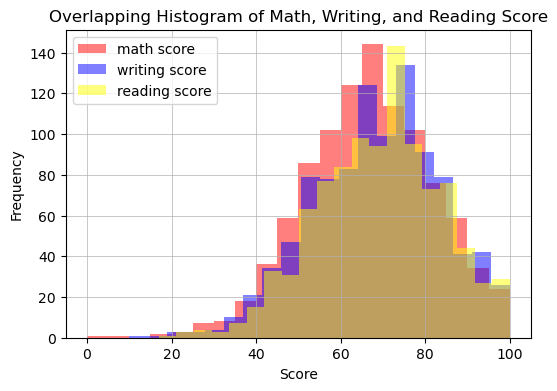

In [10]:
plt.figure(figsize=(6,4))
plt.hist(df['math score'], bins=20, alpha=.5, color='red')
plt.hist(df['writing score'], bins=20, alpha=.5, color='blue')
plt.hist(df['reading score'], bins=20, alpha=.5, color='yellow')
plt.legend(['math score', 'writing score', 'reading score'])

plt.title('Overlapping Histogram of Math, Writing, and Reading Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(linewidth=.5)
plt.show()

### Boxplot of Numerical Data

<Figure size 200x200 with 0 Axes>

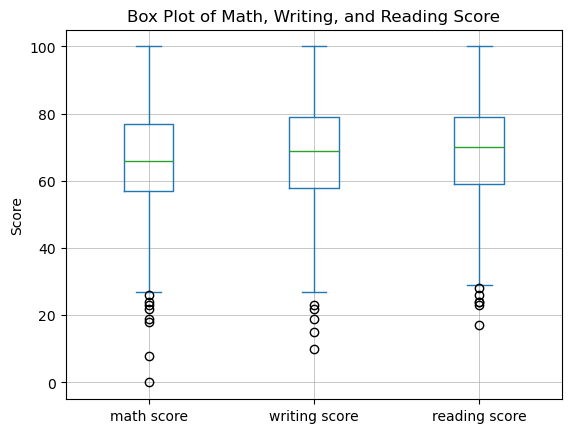

In [11]:
plt.figure(figsize=(2,2))
df.plot.box(y=['math score', 'writing score', 'reading score'])

plt.title('Box Plot of Math, Writing, and Reading Score')
plt.ylabel('Score')
plt.grid(linewidth=.5)
plt.show()

## Count certain category when sorted by another category

### Test Preparation Course Completion Number based on Students' Parents' Education Level

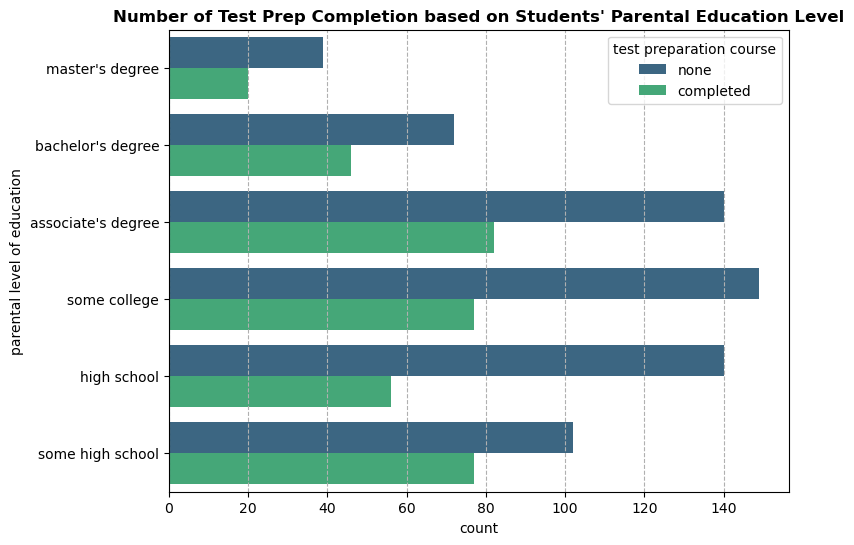

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(y='parental level of education',
              hue='test preparation course',
              data=df,
              palette='viridis',
              order=["master's degree", "bachelor's degree", "associate's degree", "some college", "high school", "some high school"])

plt.title("Number of Test Prep Completion based on Students' Parental Education Level", fontweight='bold', fontsize=12)

plt.grid(linestyle='--', axis='x')
plt.show()

In [13]:
df.groupby('parental level of education')['test preparation course'].value_counts().to_frame()

count
parental level of education test preparation course       
associate's degree          none                       140
                            completed                   82
bachelor's degree           none                        72
                            completed                   46
high school                 none                       140
                            completed                   56
master's degree             none                        39
                            completed                   20
some college                none                       149
                            completed                   77
some high school            none                       102
                            completed                   77

### Parents' Education Level based on Race/Ethnicity

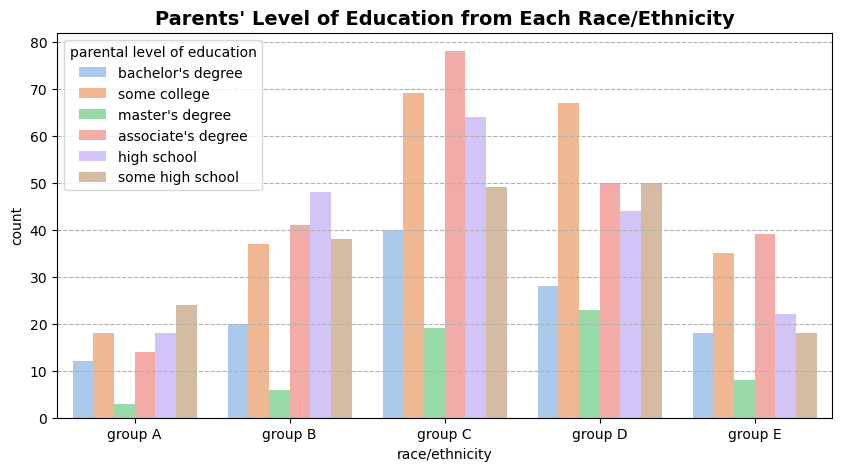

In [14]:
plt.figure(figsize=(10,5))

sns.countplot(x='race/ethnicity',
              hue='parental level of education',
              data=df,
              order=['group A', 'group B', 'group C', 'group D', 'group E'],
              palette='pastel')

plt.title("Parents' Level of Education from Each Race/Ethnicity", fontweight='bold', fontsize=14)
plt.grid(linestyle='--', axis='y')

plt.show()

In [15]:
df.groupby('race/ethnicity')['parental level of education'].value_counts().to_frame()

count
race/ethnicity parental level of education       
group A        some high school                24
               some college                    18
               high school                     18
               associate's degree              14
               bachelor's degree               12
               master's degree                  3
group B        high school                     48
               associate's degree              41
               some high school                38
               some college                    37
               bachelor's degree               20
               master's degree                  6
group C        associate's degree              78
               some college                    69
               high school                     64
               some high school                49
               bachelor's degree               40
               master's degree                 19
group D        some college                    67
               associate's degree              50
               some high school                50
               high school                     44
               bachelor's degree               28
               master's degree                 23
group E        associate's degree              39
               some college                    35
               high school                     22
               bachelor's degree               18
               some high school                18
               master's degree                  8

### Number of Male and Female Students from Each Race/Ethnicity

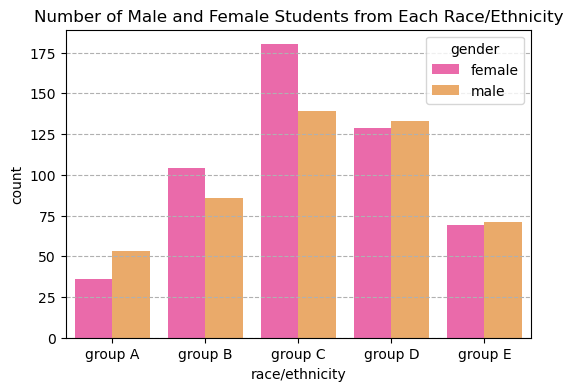

In [16]:
plt.figure(figsize=(6,4))

sns.countplot(x='race/ethnicity',
              hue='gender',
              data=df,
              order=['group A', 'group B', 'group C', 'group D', 'group E'],
              palette='spring')

plt.title('Number of Male and Female Students from Each Race/Ethnicity')
plt.grid(linestyle='--',
         axis='y')

plt.show()

In [17]:
df.groupby('race/ethnicity')['gender'].value_counts().to_frame()

count
race/ethnicity gender       
group A        male       53
               female     36
group B        female    104
               male       86
group C        female    180
               male      139
group D        male      133
               female    129
group E        male       71
               female     69

## Correlation between the Factors and Students' Score

### Students' Gender and Scores

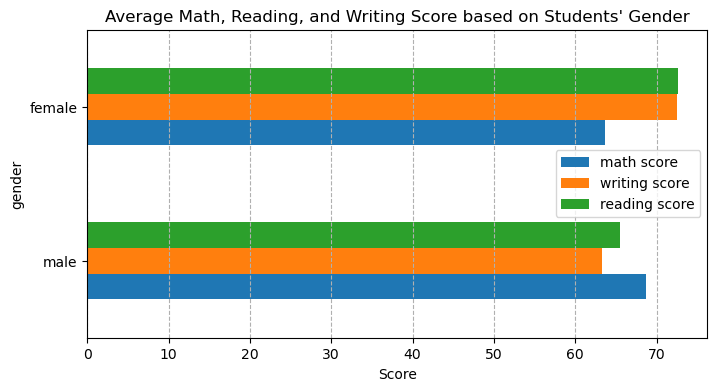

In [18]:
g = df.groupby('gender')[['math score', 'writing score', 'reading score']].mean()
g_sorted = g.sort_values(by=['math score', 'writing score', 'reading score'], ascending=False)

g_sorted.plot.barh(figsize=(8,4))

plt.title("Average Math, Reading, and Writing Score based on Students' Gender")
plt.xlabel('Score')
plt.grid(linestyle='--',
         axis='x')

plt.show()

In [19]:
g_sorted

,math score,writing score,reading score
gender,,,
male,68.728216,63.311203,65.473029
female,63.633205,72.467181,72.608108


<font color='deeppink'>**Male students have higher MATH average score, but female students have higher WRITING and READING average score.**</font>

### Students' Race/Ethnicity and Scores

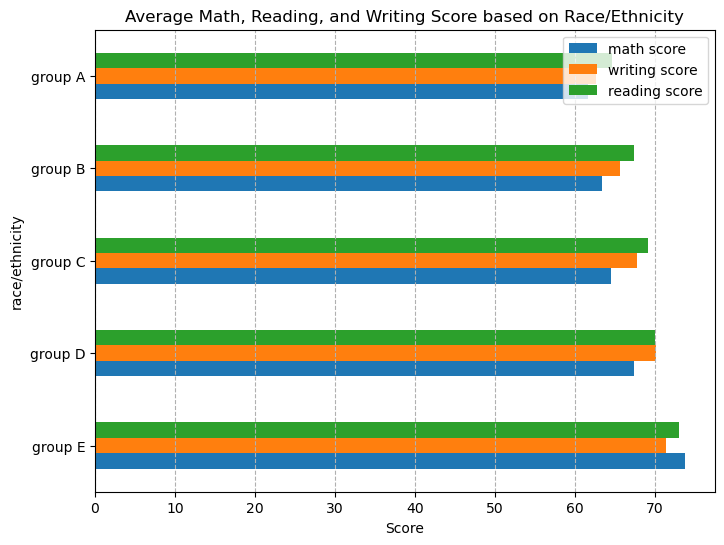

In [20]:
r = df.groupby('race/ethnicity')[['math score', 'writing score', 'reading score']].mean()
r_sorted = r.sort_values(by=['math score', 'writing score', 'reading score'], ascending=False)

r_sorted.plot.barh(figsize=(8,6))

plt.title('Average Math, Reading, and Writing Score based on Race/Ethnicity')
plt.xlabel('Score')
plt.grid(linestyle='--',
         axis='x')

plt.show()

In [21]:
r_sorted

,math score,writing score,reading score
race/ethnicity,,,
group E,73.821429,71.407143,73.028571
group D,67.362595,70.145038,70.030534
group C,64.463950,67.827586,69.103448
group B,63.452632,65.600000,67.352632
group A,61.629213,62.674157,64.674157


<font color='deeppink'>**From the plot and values above, it can be concluded that students from race/ethnicity 'group E' has the highest average score in math, writing, and reading, followed by students from group D, C, B, and A.**</font>

### Students' Parental Level of Education and Scores

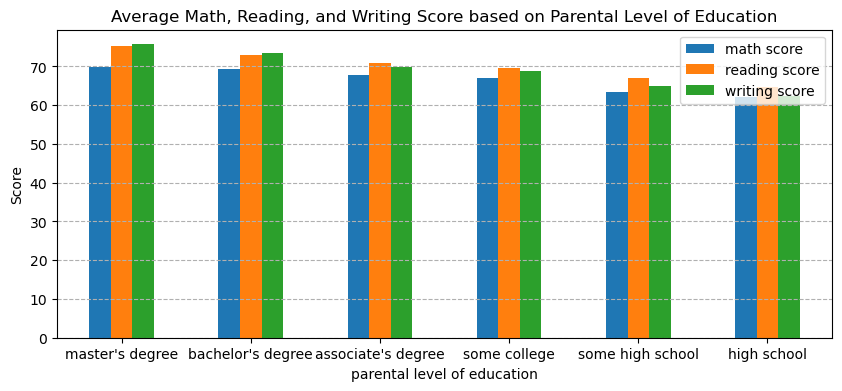

In [22]:
p = df.groupby(['parental level of education'])[['math score', 'reading score', 'writing score']].mean()
p_sorted = p.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

p_sorted.plot.bar(figsize=(10,4))

plt.xticks(rotation=0)
plt.title('Average Math, Reading, and Writing Score based on Parental Level of Education')
plt.ylabel('Score')

plt.grid(linestyle='--', axis='y')

plt.show()

In [23]:
p_sorted

,math score,reading score,writing score
parental level of education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


<font color='deeppink'>**Students whose parents have master's degree tend to have the highest average score in all subjects.**</font>

<font color='deeppink'>**As shown above, the higher the parents education is, the higher average score the students get.**</font>

### Students' Lunch and Scores

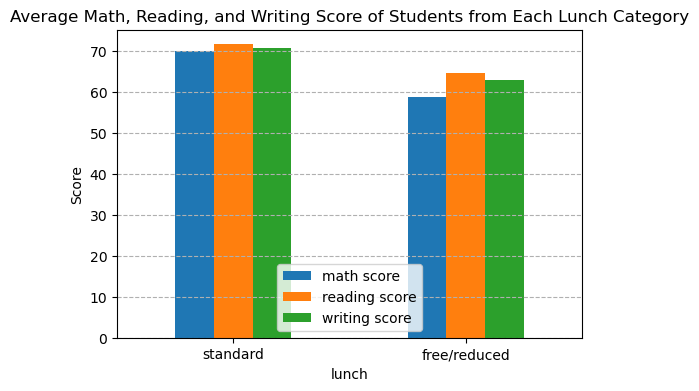

In [24]:
l = df.groupby(['lunch'])[['math score', 'reading score', 'writing score']].mean()
l_sorted = l.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

l_sorted.plot.bar(figsize=(6,4))
plt.grid(linestyle='--',
         axis='y')

plt.legend(loc='lower center')
plt.xticks(rotation=0)

plt.title('Average Math, Reading, and Writing Score of Students from Each Lunch Category')
plt.ylabel('Score')

plt.show()

In [25]:
l_sorted

,math score,reading score,writing score
lunch,,,
standard,70.034109,71.654264,70.823256
free/reduced,58.921127,64.653521,63.022535


<font color='deeppink'>**Those who have standard lunch (which is implied as the "paid and not reduced" based on the other category name) tend to have higher AVERAGE score in all three subjects.**</font>

<font color='deeppink'>**This shows that the lunch program of the student also affects their score, where those with standard lunch have higher average score.**</font>

### Students' Test Preparation Course Completion and Scores

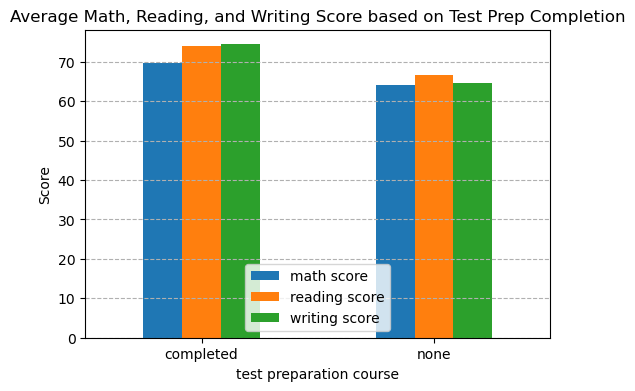

In [26]:
t = df.groupby(['test preparation course'])[['math score', 'reading score', 'writing score']].mean()
t_sorted = t.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

t_sorted.plot.bar(figsize=(6,4))
plt.xticks(rotation=0)
plt.grid(linestyle='--',
         axis='y')

plt.title('Average Math, Reading, and Writing Score based on Test Prep Completion')
plt.ylabel('Score')
plt.legend(loc='best')

plt.show()

In [27]:
t_sorted

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<font color='deeppink'>**Those who have completed the test preparation course have higher AVERAGE score in math, reading, and writing.**</font>

## Correlation between Score in Each Subject

Correlation between numerical data.

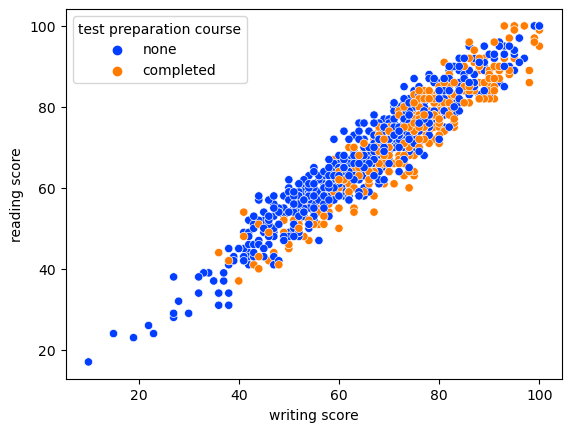

In [28]:
sns.scatterplot(x='writing score', y='reading score', data=df, hue='test preparation course', palette='bright')
plt.show()

<font color='deeppink'>**As we can see from the scatter plot above, when we trace the plot from left to right, the writing score and reading score follow the same line pattern.**</font>

<font color='deeppink'>**It shows that when the writing scores increase, the reading scores tend to increase as well.**</font>

<font color='deeppink'>**This shows that the two factors have a positive correlation thus can be concluded that writing and reading score correlate strongly with each other.**</font>

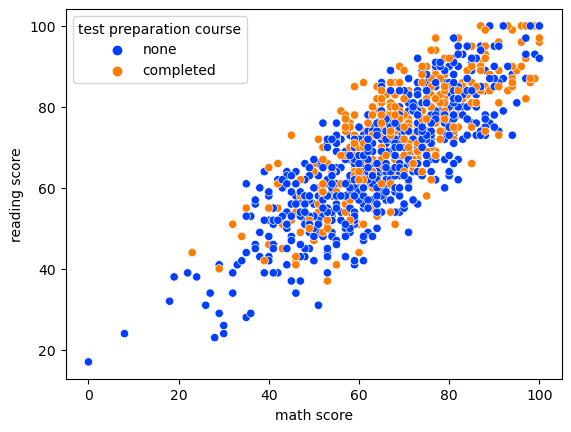

In [29]:
sns.scatterplot(x='math score', y='reading score', data=df, hue='test preparation course', palette='bright')
plt.show()

<font color='deeppink'>**In a glimpse, the dots seem to follow the same uphill line pattern from left to right, meaning the two factors have positive correlation.**</font>

<font color='deeppink'>**However, the data points are more spread out compared to the previous scatter plot. This means that reading score has weaker correlation with math score that it does with writing score.**</font>

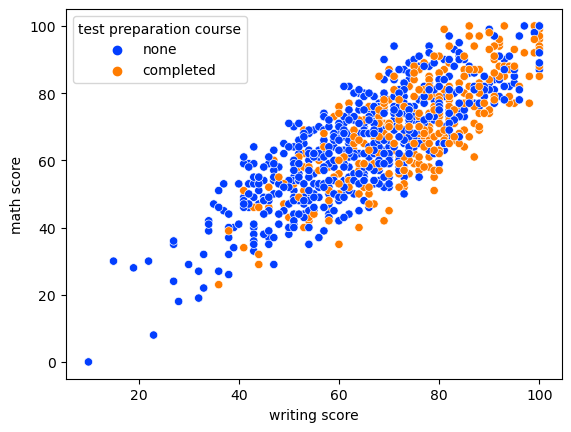

In [30]:
sns.scatterplot(x='writing score', y='math score', data=df, hue='test preparation course', palette='bright')
plt.show()

<font color='deeppink'>**Although the data points are not totally clustered, we could say that writing course and math score are somewhat correlated as the plot shows that writing score increases as math score increases.**</font>